# Variables definition

In [1]:
import os
from dotenv import load_dotenv

if not load_dotenv("./../../../config/credentials_my.env", override=True):
    print("Environment variables not loaded :-(")
else:
    print("Environment variables have been loaded ;-)")


openai_endpoint       = os.environ["AZURE_OPENAI_ENDPOINT"]
openai_api_key        = os.environ["AZURE_OPENAI_API_KEY"]
openai_api_version    = os.environ["openai_api_version"]
azure_deployment_name = "gpt-4.1-for-apim" # os.environ["AZURE_OPENAI_CHAT_DEPLOYMENT_NAME"]

apim_endpoint         = os.environ["apim_endpoint"]
apim_subscription_key = os.environ["apim_subscription_key_premium"] # apim_subscription_key_service, apim_subscription_key_standard and apim_subscription_key_premium
apim_api_version      = os.environ["apim_api_version"] # never used

messages = [
    {
      "role": "user",
      "content": "What is a meaning function? Please summarize in less than 20 words."
    }
]

print(f"openai_endpoint: {openai_endpoint}")
print(f"apim_endpoint: {apim_endpoint}")

Environment variables have been loaded ;-)
openai_endpoint: https://mmoaiswc-01.openai.azure.com/
apim_endpoint: https://mauromiapim02.azure-api.net/balanced-azure-openai-service-api/


# Invoking Open AI via HTTP

In [2]:
import requests

messages_json = {"messages": messages}

url = f"{openai_endpoint}openai/deployments/{azure_deployment_name}/chat/completions?api-version={openai_api_version}"
print(f'This is the Open AI endpoint and body that is invoked:\n- {url}\n- {messages_json}')

This is the Open AI endpoint and body that is invoked:
- https://mmoaiswc-01.openai.azure.com/openai/deployments/gpt-4.1-for-apim/chat/completions?api-version=2025-04-01-preview
- {'messages': [{'role': 'user', 'content': 'What is a meaning function? Please summarize in less than 20 words.'}]}


In [3]:
response_http = requests.post(url, headers = {'api-key':openai_api_key}, json = {"messages": messages})

if (int(response_http.status_code / 100))==2:
    print(f"{response_http.json()['choices'][0]['message']['content']}\nx-ms-region = {response_http.headers['x-ms-region']}")
else:
    print(response_http.text)

{"error":{"code":"429","message": "Requests to the ChatCompletions_Create Operation under Azure OpenAI API version 2025-04-01-preview have exceeded call rate limit of your current OpenAI S0 pricing tier. Please retry after 11 seconds. Please go here: https://aka.ms/oai/quotaincrease if you would like to further increase the default rate limit. For Free Account customers, upgrade to Pay as you Go here: https://aka.ms/429TrialUpgrade."}}


# Invoking Open AI via Azure SDK

In [4]:
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint = openai_endpoint,
    api_key        = openai_api_key,
    api_version    = openai_api_version
)

In [5]:
response_sdk = client.chat.completions.create(
    model    = azure_deployment_name,
    messages = messages)

print(response_sdk.choices[0].message.content)

A meaning function assigns meanings or interpretations to expressions within a formal language or system.


# Invoking APIM via HTTP

In [6]:
import requests

messages_json = {"messages": messages}

url = f"{apim_endpoint}openai/deployments/{azure_deployment_name}/chat/completions?api-version={openai_api_version}"
print(f'This is the Open AI endpoint and body that is invoked:\n- {url}\n- {messages_json}')

This is the Open AI endpoint and body that is invoked:
- https://mauromiapim02.azure-api.net/balanced-azure-openai-service-api/openai/deployments/gpt-4.1-for-apim/chat/completions?api-version=2025-04-01-preview
- {'messages': [{'role': 'user', 'content': 'What is a meaning function? Please summarize in less than 20 words.'}]}


In [7]:
response_http = requests.post(url, headers = {'api-key':apim_subscription_key}, json = {"messages": messages})
if (int(response_http.status_code / 100))==2:
    print(f"{response_http.json()['choices'][0]['message']['content']}\nx-ms-region = {response_http.headers['x-ms-region']}")
else:
    print(response_http.text)

A meaning function assigns meanings or interpretations to expressions in a formal language, often in logic or semantics.
x-ms-region = South Central US


# Invoking APIM via Azure SDK

In [8]:
from openai import AzureOpenAI

client = AzureOpenAI(
    azure_endpoint = apim_endpoint,
    api_key        = apim_subscription_key,
    api_version    = openai_api_version
)

In [9]:
response_sdk = client.chat.completions.create(
    model    = azure_deployment_name,
    messages = messages)

print(response_sdk.choices[0].message.content)

A meaning function assigns meanings to expressions within a formal language, mapping syntactic elements to semantic interpretations.


## Loading test
Please configure `APIM Backend Circuit Breaker` as follows before running the following cell:<br/>
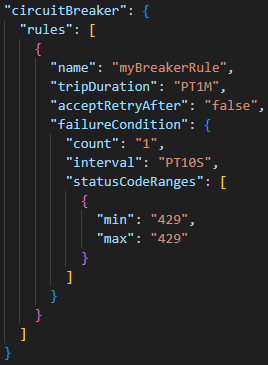

In [13]:
from datetime import datetime
for i in range(1000):
    response_sdk = client.chat.completions.create(
        model    = azure_deployment_name,
        messages = messages)

    print(f"step {i} at {datetime.now()}: {response_sdk.choices[0].message.content}")

step 0 at 2025-06-15 19:24:58.285508: A meaning function maps linguistic expressions to their semantic interpretations, capturing their meaning within a specific context.
step 1 at 2025-06-15 19:24:58.745914: A meaning function maps symbols, expressions, or linguistic elements to their interpretations or associated meanings within a system.
step 2 at 2025-06-15 19:24:59.128226: A meaning function maps linguistic expressions to their meanings, enabling the interpretation of language in context.
step 3 at 2025-06-15 19:24:59.514272: A meaning function maps symbols or expressions to their interpretations or semantic content in a given context.
step 4 at 2025-06-15 19:24:59.929710: A meaning function assigns semantic values or interpretations to linguistic expressions within a given context or formal system.
step 5 at 2025-06-15 19:25:08.945007: A meaning function maps symbols or linguistic expressions to their interpretations or semantic content in a given context.
step 6 at 2025-06-15 19

KeyboardInterrupt: 